<a href="https://colab.research.google.com/github/kevykibbz/aistaffs/blob/main/tanish_tiny_object_detection_maskrcnn_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rtlmhjbn_ip02_dataset_path = kagglehub.dataset_download('rtlmhjbn/ip02-dataset')

print('Data source import complete.')


In [ ]:
!nvidia-smi

Fri Jan 17 08:53:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
import warnings
warnings.filterwarnings("ignore")
HOME = os.getcwd()
HOME

'/kaggle/working'

In [ ]:
!pip install addict yapf transformers
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 8.1 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cpu


In [ ]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

/kaggle/working
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 463 (delta 175), reused 136 (delta 136), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 36.51 MiB/s, done.
Resolving deltas: 100% (241/241), done.
/kaggle/working/GroundingDINO
  Preparing metadata (setup.py) ... done


In [ ]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/kaggle/working
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-dr4fdmex
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-dr4fdmex
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


In [ ]:
!pip uninstall -y supervision
!pip install -q supervision==0.6.0

import supervision as sv
print(sv.__version__)

Found existing installation: supervision 0.6.0
Uninstalling supervision-0.6.0:
  Successfully uninstalled supervision-0.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.
0.6.0


In [ ]:
GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

/kaggle/working/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [ ]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/kaggle/working
/kaggle/working/weights


In [ ]:
GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

/kaggle/working/weights/groundingdino_swint_ogc.pth ; exist: True


In [ ]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/kaggle/working
/kaggle/working/weights


In [ ]:
SAM_CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))

/kaggle/working/weights/sam_vit_h_4b8939.pth ; exist: True


In [ ]:
import torch
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cuda')

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python-headless matplotlib lxml

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-y7zp_o4v
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-y7zp_o4v
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/kaggle/working/GroundingDINO
final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
SAM_ENCODER_VERSION = "vit_h"
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)
sam_predictor

In [ ]:
# Import required libraries
import cv2
import json
import random
import shutil
import sys
import json
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import supervision as sv
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
from xml.etree.ElementTree import Element, SubElement, tostring
from xml.dom.minidom import parseString
from tqdm.notebook import tqdm

In [ ]:
INPUT="/kaggle/input"
OUTPUT="/kaggle/working/mask_rcnn_project"
input_dir=f"{INPUT}/ip02-dataset"
output_dir=f"{OUTPUT}/data"
folders = ['train', 'val', 'test']

if(os.path.exists(output_dir)):
  shutil.rmtree(output_dir)

for folder in folders:
    os.makedirs(os.path.join(output_dir, folder, 'annotations'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, folder, 'images'), exist_ok=True)

print("Directories created successfully")

Directories created successfully


In [ ]:
# Paths to the datasets and auxiliary files
dataset_path=f"{input_dir}/ip02-dataset"
train_path = f'{input_dir}/classification/train'
val_path = f'{input_dir}/classification/val'
test_path = f'{input_dir}/classification/test'
classes_file = f'{input_dir}/classes.txt'
test_txt_file =f'{input_dir}/test.txt'
train_txt_file =f'{input_dir}/train.txt'
val_txt_file =f'{input_dir}/test.txt'

# Read classes.txt to get a list of class IDs and names
with open(classes_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
num_classes = len(classes)
num_classes

102

In [ ]:
# Function to count images based on txt files
def count_images_from_txt(txt_file):
    total_count = 0
    class_counts = {class_id: 0 for class_id in range(1, num_classes + 1)}

    with open(txt_file, 'r') as f:
        for line in f:
            _, class_id = line.strip().split()
            class_id = int(class_id) + 1  # Convert 0-based to 1-based index
            class_counts[class_id] += 1
            total_count += 1

    return total_count, class_counts

# Count images in train, val, and test sets using their respective txt files
train_total, train_class_counts = count_images_from_txt(train_txt_file)
val_total, val_class_counts = count_images_from_txt(val_txt_file)
test_total, test_class_counts = count_images_from_txt(test_txt_file)
total_images = train_total + val_total + test_total

# Display the results
print(f"Total images in train: {train_total}")
print(f"Class-wise counts in train: {train_class_counts}")
print("-------------------------------------------------")
print(f"Total images in val: {val_total}")
print(f"Class-wise counts in val: {val_class_counts}")
print("-------------------------------------------------")
print(f"Total images in test: {test_total}")
print(f"Class-wise counts in test: {test_class_counts}")
print("-------------------------------------------------")
print(f"Total images in the dataset: {total_images}")

Total images in train: 45095
Class-wise counts in train: {1: 669, 2: 292, 3: 156, 4: 631, 5: 302, 6: 303, 7: 221, 8: 500, 9: 535, 10: 331, 11: 513, 12: 242, 13: 103, 14: 245, 15: 516, 16: 989, 17: 532, 18: 88, 19: 512, 20: 294, 21: 287, 22: 317, 23: 1018, 24: 642, 25: 2456, 26: 339, 27: 414, 28: 392, 29: 195, 30: 424, 31: 291, 32: 139, 33: 147, 34: 175, 35: 203, 36: 82, 37: 62, 38: 473, 39: 513, 40: 962, 41: 179, 42: 162, 43: 184, 44: 114, 45: 314, 46: 639, 47: 393, 48: 492, 49: 836, 50: 392, 51: 845, 52: 1138, 53: 156, 54: 106, 55: 527, 56: 111, 57: 281, 58: 228, 59: 840, 60: 212, 61: 105, 62: 47, 63: 169, 64: 50, 65: 184, 66: 84, 67: 458, 68: 3186, 69: 690, 70: 767, 71: 3048, 72: 415, 73: 42, 74: 269, 75: 231, 76: 103, 77: 433, 78: 251, 79: 154, 80: 135, 81: 44, 82: 59, 83: 414, 84: 232, 85: 263, 86: 100, 87: 782, 88: 186, 89: 242, 90: 113, 91: 135, 92: 210, 93: 484, 94: 303, 95: 346, 96: 292, 97: 126, 98: 183, 99: 55, 100: 333, 101: 274, 102: 3444}
----------------------------------

In [ ]:
def copy_images(source_path, dest_path, split, percentage):
    file_path = f"{source_path}/{split}.txt"
    # Initialize counters for overall and class-wise images
    overall_count = 0
    class_counts = {}

    # Prepare a list to store the output for train.txt, test.txt, or val.txt
    output_lines = []

    if os.path.exists(file_path):
        with open(file_path, 'r') as f:
            lines = [line.strip() for line in f.readlines()]

        # Group images by class ID
        class_images = {}
        for line in lines:
            image_file, class_id = line.split()
            if class_id not in class_images:
                class_images[class_id] = []
            class_images[class_id].append(image_file)

        # Copy selected images and count them
        for class_id, images in class_images.items():
            num_to_copy = int(len(images) * percentage)
            selected_images = random.sample(images, num_to_copy)

            # Create the destination folder for images (no class_id in path)
            class_dest_folder = os.path.join(dest_path, split, 'images')
            os.makedirs(class_dest_folder, exist_ok=True)

            # Update class count
            class_counts[class_id] = class_counts.get(class_id, 0) + num_to_copy

            for image_file in selected_images:
                # Construct the full source path, including the class_id directory
                src_image_path = os.path.join(source_path, "classification", split, str(class_id), image_file)
                dest_image_path = os.path.join(class_dest_folder, image_file)

                if not os.path.exists(src_image_path):
                    print(f"Warning: Source file does not exist - {src_image_path}")
                    continue  # Skip missing files

                if not os.path.exists(dest_image_path):
                    shutil.copy(src_image_path, dest_image_path)
                    overall_count += 1  # Increment overall image counter
                    # Add the image and class_id to the output_lines list
                    output_lines.append(f"{image_file} {class_id}")

    else:
        print(f"The file {file_path} does not exist.")

    # Write the output lines (image_name and class_id) to the appropriate txt file
    os.makedirs(os.path.join(dest_path, "catalogue"), exist_ok=True)
    output_txt_path = os.path.join(dest_path, "catalogue", f"{split}.txt")

    with open(output_txt_path, 'w') as f:
        f.write("\n".join(output_lines))
        print('Done logging.')

    # After copying, print the counts
    print(f"\n{split.upper()} Split Summary:")
    print(f"Total images copied: {overall_count}")
    print("--------------------------------------")
    for class_id, count in class_counts.items():
        print(f"Class {class_id}: {count} images")

# Copy 10% of images for each dataset and report counts
copy_images(input_dir, output_dir, "train", 0.01)
copy_images(input_dir, output_dir, "test", 0.01)
copy_images(input_dir, output_dir, "val", 0.01)

print("\nImages copied successfully!")

Done logging.

TRAIN Split Summary:
Total images copied: 403
--------------------------------------
Class 0: 6 images
Class 1: 2 images
Class 2: 1 images
Class 3: 6 images
Class 4: 3 images
Class 5: 3 images
Class 6: 2 images
Class 7: 5 images
Class 8: 5 images
Class 9: 3 images
Class 10: 5 images
Class 11: 2 images
Class 12: 1 images
Class 13: 2 images
Class 14: 5 images
Class 15: 9 images
Class 16: 5 images
Class 17: 0 images
Class 18: 5 images
Class 19: 2 images
Class 20: 2 images
Class 21: 3 images
Class 22: 10 images
Class 23: 6 images
Class 24: 24 images
Class 25: 3 images
Class 26: 4 images
Class 27: 3 images
Class 28: 1 images
Class 29: 4 images
Class 30: 2 images
Class 31: 1 images
Class 32: 1 images
Class 33: 1 images
Class 34: 2 images
Class 35: 0 images
Class 36: 0 images
Class 37: 4 images
Class 38: 5 images
Class 39: 9 images
Class 40: 1 images
Class 41: 1 images
Class 42: 1 images
Class 43: 1 images
Class 44: 3 images
Class 45: 6 images
Class 46: 3 images
Class 47: 4 ima

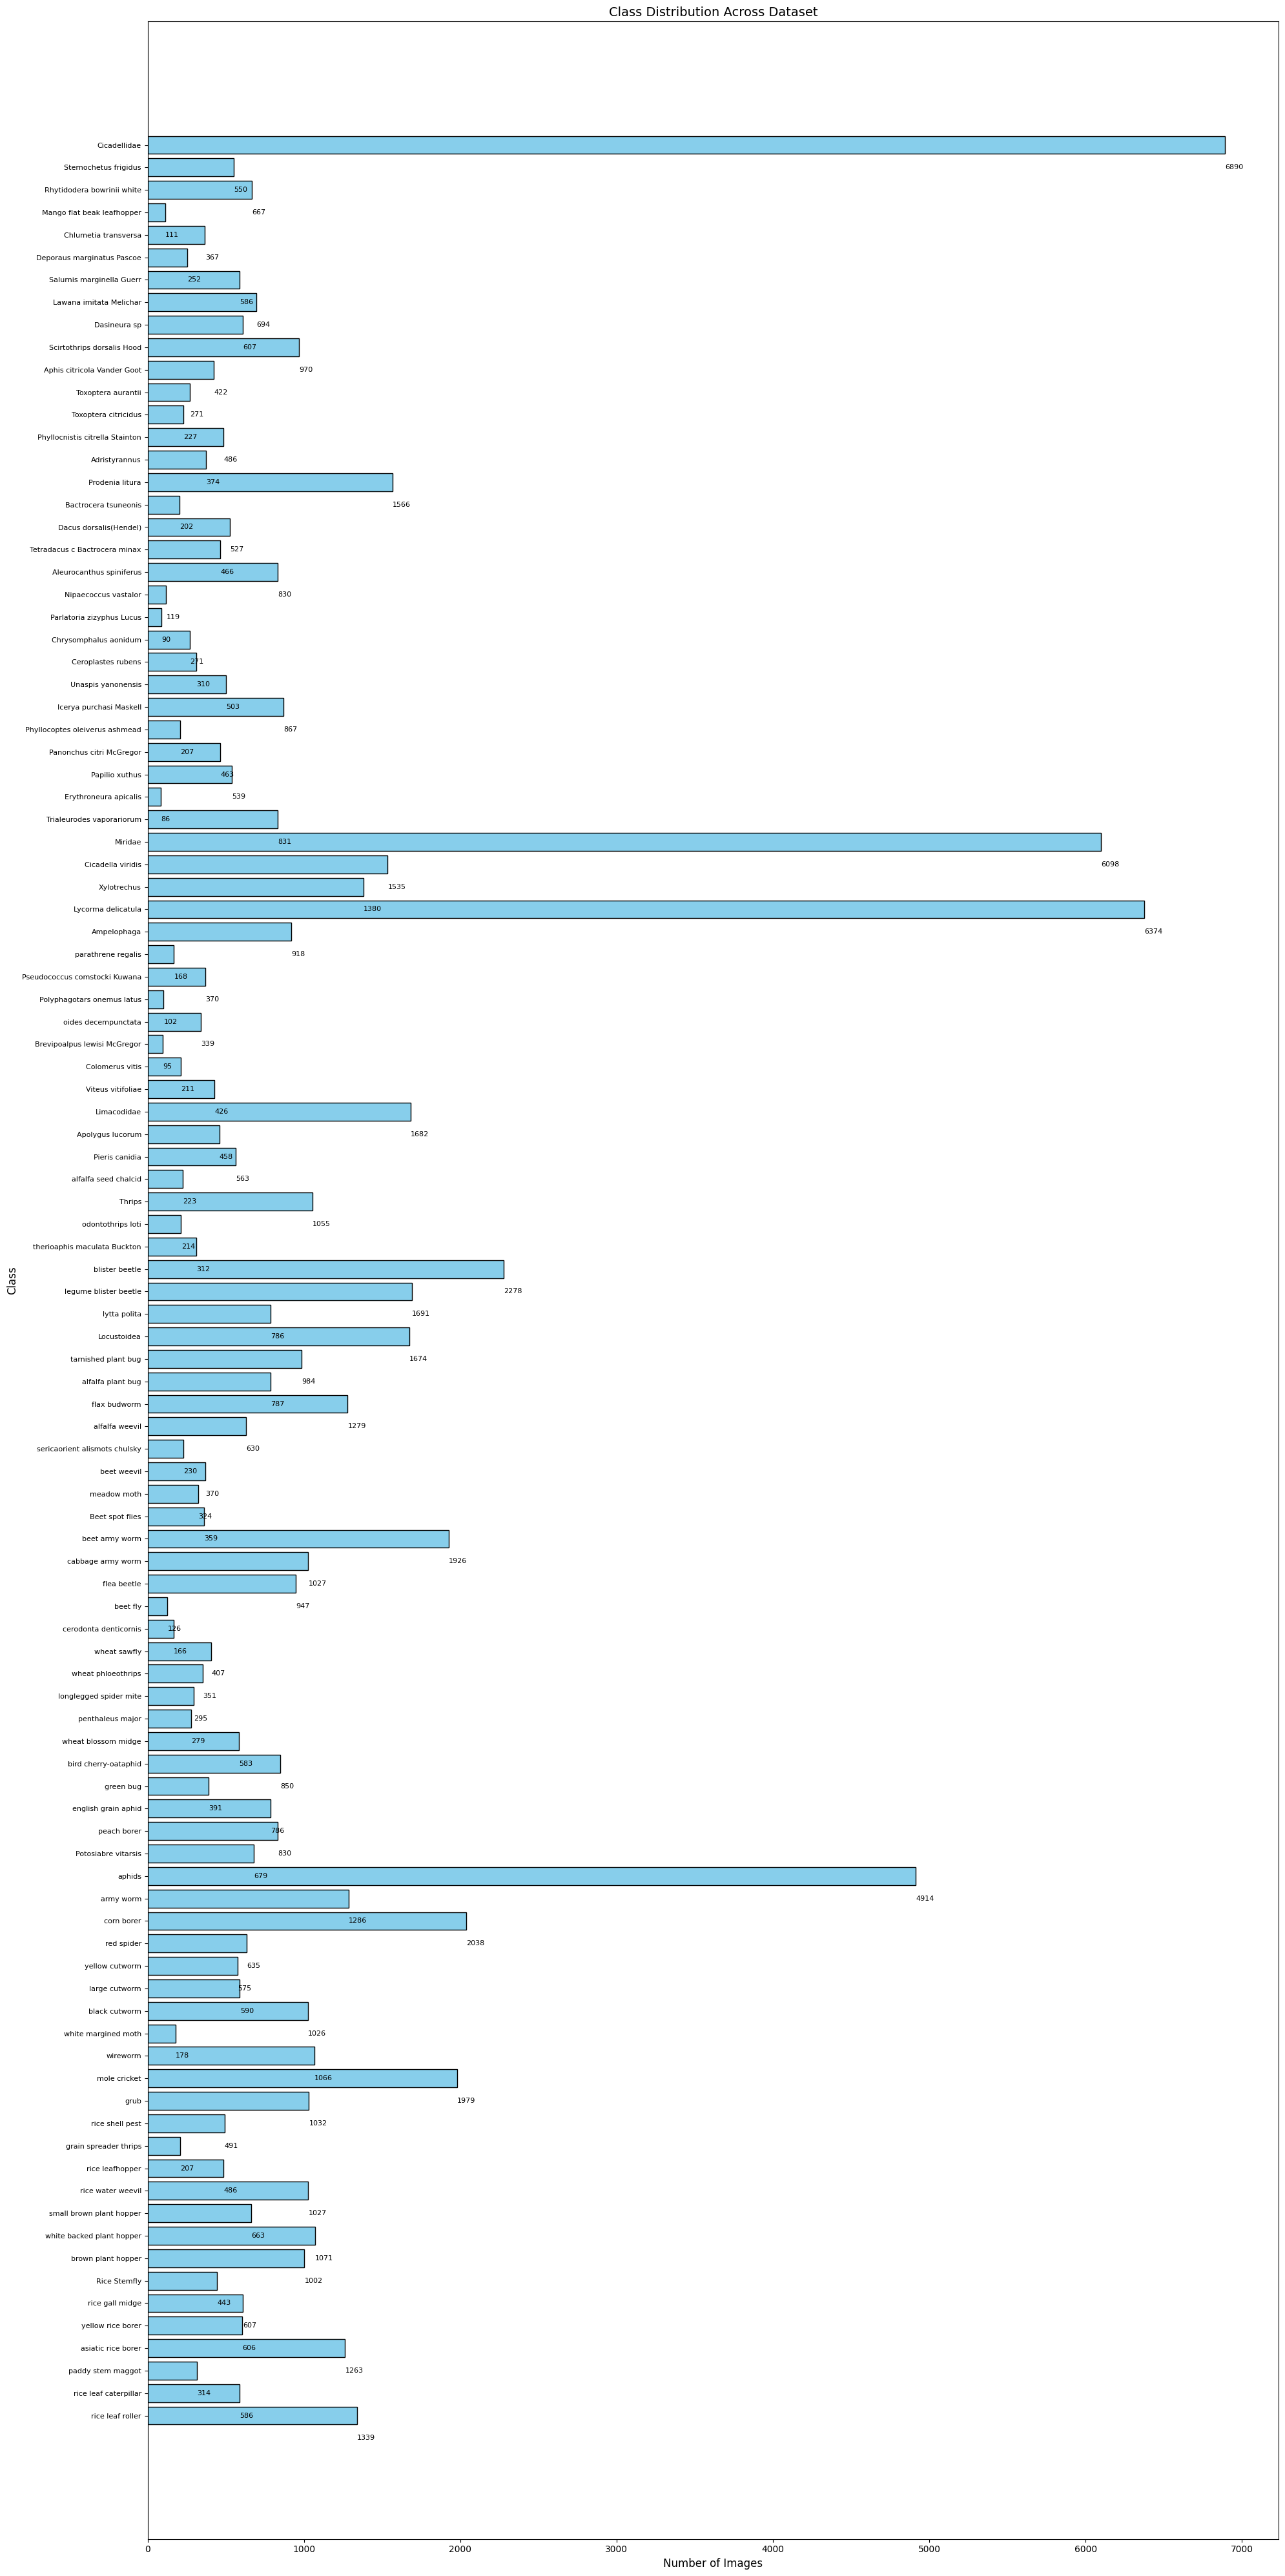

In [ ]:
# Read class names from classes.txt
class_names = {}
with open(classes_file, 'r') as file:
    for line in file:
        parts = line.split(maxsplit=1)
        if len(parts) == 2:
            class_id = int(parts[0])
            class_name = parts[1].strip()
            class_names[class_id] = class_name

# Combine train, validation, and test class counts
total_class_counts = {class_id: train_class_counts.get(class_id, 0) +
                      val_class_counts.get(class_id, 0) +
                      test_class_counts.get(class_id, 0)
                      for class_id in range(1, num_classes + 1)}

# Prepare data for plotting
class_ids = list(total_class_counts.keys())
counts = list(total_class_counts.values())
class_labels = [class_names.get(class_id, f"Class {class_id}") for class_id in class_ids]

# Plot class distribution
plt.figure(figsize=(20, 40))
plt.barh(class_ids, counts, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Class', fontsize=12)
plt.title('Class Distribution Across Dataset', fontsize=14)
plt.yticks(class_ids, class_labels, fontsize=8)

# Add count labels to bars
for i, count in enumerate(counts):
    plt.text(count + 1, i, str(count), va='center', fontsize=8)

# Save the plot as an image
plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

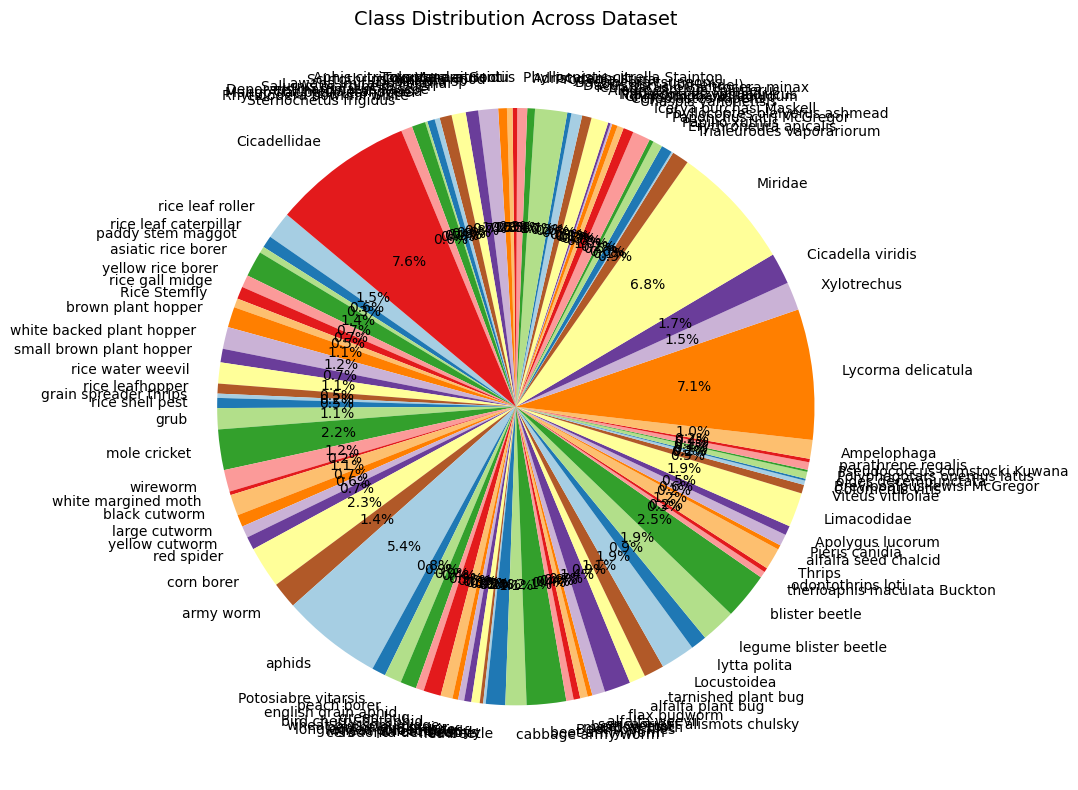

In [ ]:
# Read class names from classes.txt
class_names = {}
with open(classes_file, 'r') as file:
    for line in file:
        parts = line.split(maxsplit=1)
        if len(parts) == 2:
            class_id = int(parts[0])
            class_name = parts[1].strip()
            class_names[class_id] = class_name

# Combine train, validation, and test class counts
total_class_counts = {class_id: train_class_counts.get(class_id, 0) +
                      val_class_counts.get(class_id, 0) +
                      test_class_counts.get(class_id, 0)
                      for class_id in range(1, num_classes + 1)}

# Prepare data for plotting
class_ids = list(total_class_counts.keys())
counts = list(total_class_counts.values())
class_labels = [class_names.get(class_id, f"Class {class_id}") for class_id in class_ids]

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=class_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add title
plt.title('Class Distribution Across Dataset', fontsize=14)

# Save the pie chart as an image
plt.tight_layout()
plt.savefig('class_distribution_pie_chart.png')
plt.show()

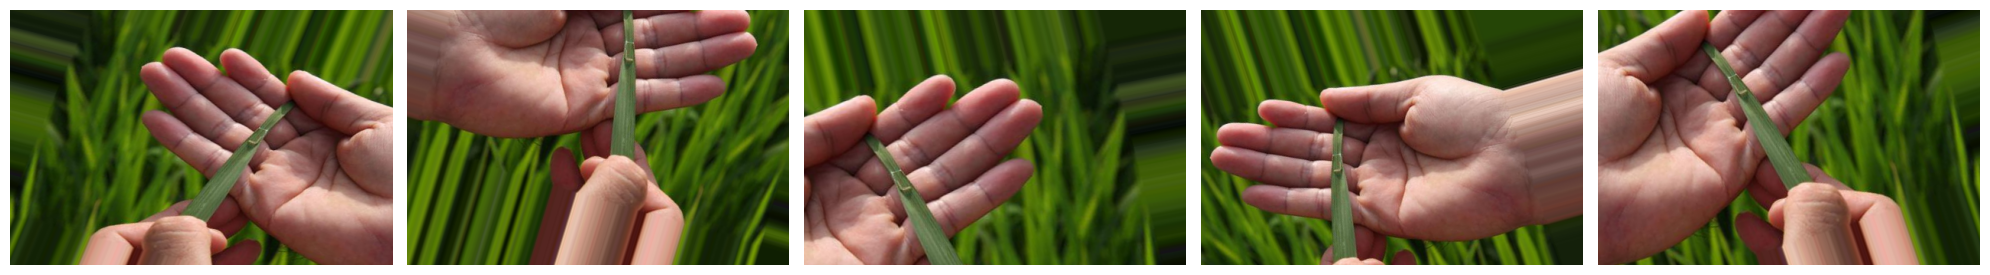

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment a sample image
sample_image = cv2.imread('/kaggle/working/mask_rcnn_project/data/test/images/00007.jpg')
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
sample_image = sample_image.reshape((1,) + sample_image.shape)

# Generate augmented images
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, batch in enumerate(datagen.flow(sample_image, batch_size=1)):
    if i >= 5:
        break
    axes[i].imshow(batch[0].astype('uint8'))
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#Handling Class Imbalance

from sklearn.utils.class_weight import compute_class_weight

# Create a list of all class ids from the train dataset
all_class_ids = []

with open(train_txt_file, 'r') as f:
    for line in f:
        _, class_id = line.strip().split()
        all_class_ids.append(int(class_id))

# Calculate class weights using the class distribution in the training set
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_class_ids),
    y=all_class_ids
)

# Map class IDs to class weights
class_weights_dict = {class_id: weight for class_id, weight in zip(np.unique(all_class_ids), class_weights)}

print(f"Class weights: {class_weights_dict}")

Class weights: {0: 0.6608487939271374, 1: 1.5140679559495032, 2: 2.834024635495224, 3: 0.7006463441160934, 4: 1.4639332554213738, 5: 1.4591017925321943, 6: 2.0004879779966287, 7: 0.8842156862745097, 8: 0.8263698002565513, 9: 1.3356732421065103, 10: 0.8618086610862669, 11: 1.8268919137903095, 12: 4.292309156672378, 13: 1.8045218087234893, 14: 0.856798145614835, 15: 0.4470251194512183, 16: 0.8310297803331859, 17: 5.023952762923352, 18: 0.863491881127451, 19: 1.5037681739362412, 20: 1.5404454464712714, 21: 1.3946619657326653, 22: 0.4342906121191109, 23: 0.6886415002137927, 24: 0.1800113367822699, 25: 1.3041529296084216, 26: 1.0678933409112437, 27: 1.1278261304521808, 28: 2.267219708396179, 29: 1.0427071772105068, 30: 1.5192709386159962, 31: 3.1806319650162225, 32: 3.0075363478724824, 33: 2.526330532212885, 34: 2.1778711484593836, 35: 5.39155906264945, 36: 7.130771663504111, 37: 0.9346888861252747, 38: 0.8618086610862669, 39: 0.459571562512739, 40: 2.4698762186438823, 41: 2.729060760106511

In [ ]:
# Use the generator to augment the images in the underrepresented classes
def augment_data_for_class(class_folder, split, percentage_increase=0.5):
    """
    Function to augment data for a specific class based on its folder name.
    It augments images in the underrepresented class by a given percentage.
    """
    class_image_folder = os.path.join(output_dir, split, "images", class_folder)
    image_files = os.listdir(class_image_folder)
    if len(image_files) > 0:
        # Randomly augment a percentage of the images for this class
        for image_file in image_files:
            img_path = os.path.join(class_image_folder, image_file)
            img = image.load_img(img_path)
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            # Generate augmented images
            i = 0
            for batch in datagen.flow(img_array, save_to_dir=class_image_folder, save_prefix='aug', save_format='jpeg'):
                i += 1
                if i > percentage_increase * len(image_files):  # Increase by a given percentage
                    break

# Loop through all class folders and augment underrepresented classes
for split in ['train', 'test', 'val']:
    split_folder = os.path.join(output_dir, split, "images")
    class_folders = [folder for folder in os.listdir(split_folder) if os.path.isdir(os.path.join(split_folder, folder))]

    for class_folder in class_folders:
        class_folder_path = os.path.join(split_folder, class_folder)
        num_images = len(os.listdir(class_folder_path))
        if num_images < 50:
            augment_data_for_class(class_folder, split)

print("Data augmentation for underrepresented classes complete.")

Data augmentation for underrepresented classes complete.


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import roboflow
roboflow.login(force=True)

visit https://app.roboflow.com/auth-cli to get your authentication token.


Paste the authentication token here:  ········


In [ ]:
!roboflow workspace list


tinyobjectdetectionwithmaskrcnn (default workspace)
  link: https://app.roboflow.com/tinyobjectdetectionwithmaskrcnn-r7qkc
  id: tinyobjectdetectionwithmaskrcnn-r7qkc

testing
  link: https://app.roboflow.com/testing-r1y34
  id: testing-r1y34


In [ ]:
!roboflow project list

loading Roboflow workspace...

auto-generated-dataset-7
  link: https://app.roboflow.com/tinyobjectdetectionwithmaskrcnn-r7qkc/auto-generated-dataset-7-u4wwj
  id: tinyobjectdetectionwithmaskrcnn-r7qkc/auto-generated-dataset-7-u4wwj
  type: instance-segmentation
  versions: 0
  images: 0
  classes: dict_keys(['wireworm', 'blister beetle', 'rice leaf roller', 'aphids'])

instance-segmentation
  link: https://app.roboflow.com/tinyobjectdetectionwithmaskrcnn-r7qkc/instance-segmentation-bpqqa
  id: tinyobjectdetectionwithmaskrcnn-r7qkc/instance-segmentation-bpqqa
  type: instance-segmentation
  versions: 0
  images: 0
  classes: dict_keys([])

tiny-object-detection
  link: https://app.roboflow.com/tinyobjectdetectionwithmaskrcnn-r7qkc/tiny-object-detection-1bjuy
  id: tinyobjectdetectionwithmaskrcnn-r7qkc/tiny-object-detection-1bjuy
  type: object-detection
  versions: 1
  images: 391
  classes: dict_keys(['pest'])


In [ ]:
!roboflow import -w tinyobjectdetectionwithmaskrcnn -p tiny-object-detection-1bjuy /kaggle/working/mask_rcnn_project/data

loading Roboflow workspace...
100%|████████████████████████████████████| 612/612 [00:00<00:00, 1673346.84it/s]
loading Roboflow project...
Uploading to existing project tinyobjectdetectionwithmaskrcnn/tiny-object-detection-1bjuy
[UPLOADED] /kaggle/working/mask_rcnn_project/data/test/images/03674.jpg (z7QLM6alsaJEr1Es2R8N) [0.6s]
[UPLOADED] /kaggle/working/mask_rcnn_project/data/test/images/02104.jpg (zgTR6YjhfuO38Z39rOw0) [0.6s]
[UPLOADED] /kaggle/working/mask_rcnn_project/data/test/images/00265.jpg (VOXFqsaPNHNoAOp7JaqO) [0.7s]
[UPLOADED] /kaggle/working/mask_rcnn_project/data/test/images/02023.jpg (hYvDENl1AeA9ZhbTb5yP) [0.8s]
[UPLOADED] /kaggle/working/mask_rcnn_project/data/test/images/04186.jpg (JJKFAg4l1rH4GZyWh0KU) [0.8s]
[UPLOADED] /kaggle/working/mask_rcnn_project/data/test/images/03408.jpg (129ZaAJwnGqS0r9h0DsM) [0.8s]
[UPLOADED] /kaggle/working/mask_rcnn_project/data/test/images/00656.jpg (AuMoPPA4IIhuhfdZeKNY) [0.9s]
[UPLOADED] /kaggle/working/mask_rcnn_project/data/test/im

In [ ]:
# Paths to the files
train_images_dir = f'{output_dir}/train/images'
test_images_dir = f'{output_dir}/test/images'
val_images_dir = f'{output_dir}/val/images'
annotations_dir = f'{OUTPUT}/annotations'


def parse_image_list(images_dir):
    image_list = []

    for image_name in os.listdir(images_dir):
        image_path = os.path.join(images_dir, image_name)

        if os.path.isfile(image_path):
            image_list.append(image_path)

    return image_list

train_image_list = parse_image_list(train_images_dir)

# Output the first image path for verification
if train_image_list:
    image_path = train_image_list[0]
    if os.path.exists(image_path):
        print(f"First Image Path: {image_path}")

First Image Path: /kaggle/working/mask_rcnn_project/data/train/images/51903.jpg


In [ ]:
SOURCE_IMAGE_PATH = image_path
CLASSES = ['pest']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

In [ ]:
from typing import List

def enhance_class_name(class_names: List[str]) -> List[str]:
    return [f"a {class_name}" for class_name in class_names]


In [ ]:
def get_valid_class_name(class_id, classes):
    try:
        class_name = classes[class_id - 1]
        return class_name.lower()
    except (IndexError, TypeError):
        return "unclassified"

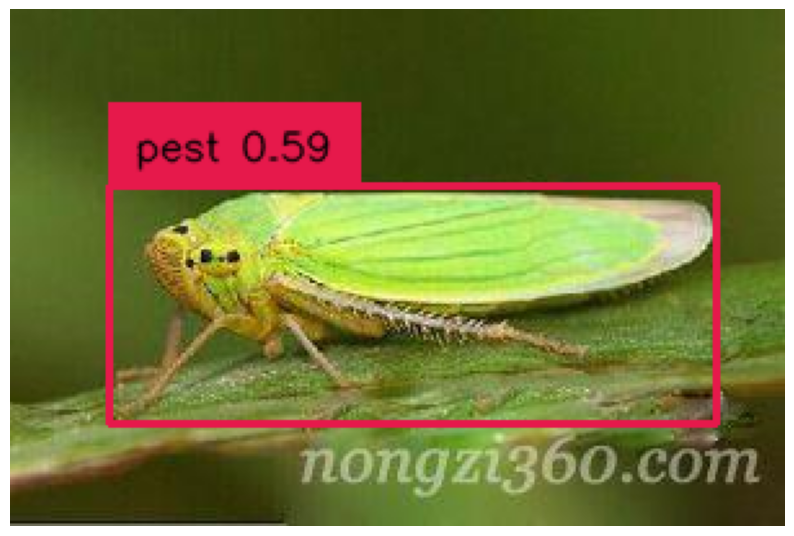

In [ ]:
# Load image
image = cv2.imread(SOURCE_IMAGE_PATH)

# Detect objects
try:
    detections = grounding_dino_model.predict_with_classes(
        image=image,
        classes=enhance_class_name(class_names=CLASSES),
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )
except Exception as e:
    print(f"Error during object detection: {e}")
    detections = []

# Annotate image with detections
box_annotator = sv.BoxAnnotator()
labels = []

for detection in detections:
    _, _, confidence, class_id, _ = detection
    # Safely get a valid class name
    class_name = get_valid_class_name(class_id, CLASSES)
    labels.append(f"{class_name} {confidence:0.2f}")

annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

# Display the annotated image
%matplotlib inline
sv.plot_image(annotated_frame, (10, 10))


In [ ]:
from segment_anything import SamPredictor


def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)

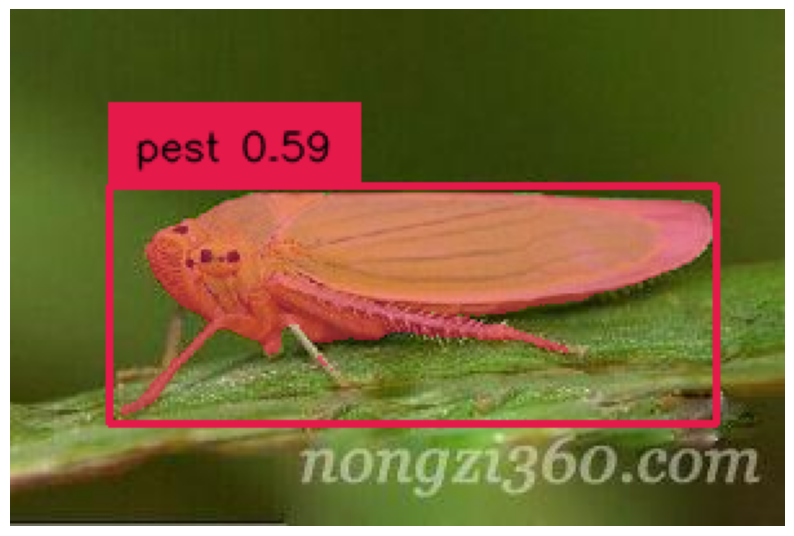

In [ ]:
# Convert detections to masks
try:
    detections.mask = segment(
        sam_predictor=sam_predictor,
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
        xyxy=detections.xyxy
    )
except Exception as e:
    print(f"Error during mask segmentation: {e}")
    detections.mask = None  # Default to no mask if segmentation fails


# Annotate image with detections
box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()

# Safely create labels
labels = []
for detection in detections:
    _, _, confidence, class_id, _ = detection
    # Get a valid class name or assign "Unknown Class"
    class_name = get_valid_class_name(class_id, CLASSES)
    labels.append(f"{class_name} {confidence:0.2f}")

try:
    annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)
except Exception as e:
    print(f"Error during annotation: {e}")
    annotated_image = image.copy()  # Fallback to original image if annotation fails

# Display the annotated image
%matplotlib inline
sv.plot_image(annotated_image, (10, 10))


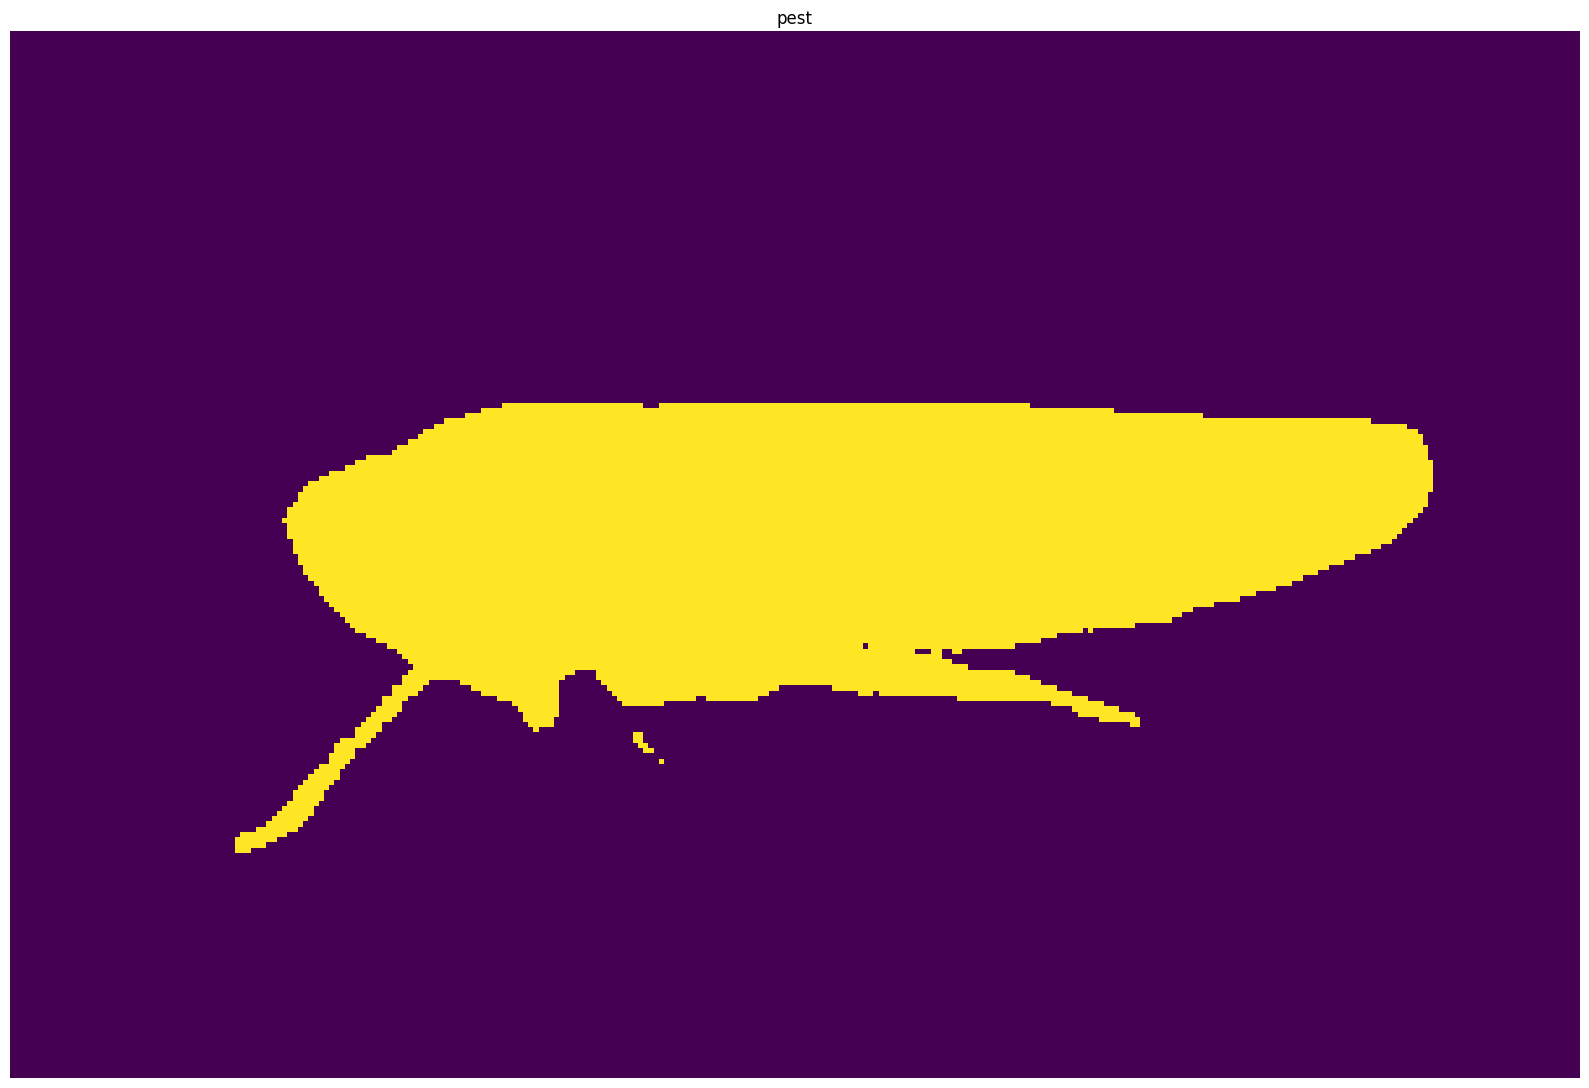

In [ ]:
import math

if detections.class_id is not None and not np.any(detections.class_id == None):
    grid_size_dimension = math.ceil(math.sqrt(len(detections.mask)))

    # Generate titles for valid classes
    titles = [CLASSES[class_id] if 0 <= class_id < len(CLASSES) else "Unknown Class" for class_id in detections.class_id]

    try:
        # Ensure grid_size is valid and axes are correctly handled
        fig, axes = plt.subplots(
            nrows=grid_size_dimension, ncols=grid_size_dimension,
            figsize=(16, 16)
        )

        # Flatten axes to handle both single and multiple axes cases
        if isinstance(axes, np.ndarray):
            axes = axes.flatten()
        else:
            axes = [axes]  # If only one subplot, convert to a list for consistency

        # Plot each image with corresponding title
        for idx, ax in enumerate(axes):
            if idx < len(detections.mask):
                ax.imshow(detections.mask[idx])  # Display image
                ax.set_title(titles[idx])  # Set title for each image
                ax.axis('off')  # Hide axis labels
            else:
                ax.axis('off')  # Hide unused axes

        plt.tight_layout()
        plt.show()
    except AttributeError as e:
        print(f"Error during plotting: {e}. Ensure grid_size is correct.")
else:
    print('Invalid class IDs detected or class_id is None.')


In [ ]:
def get_segmentation_points(mask: np.ndarray) -> List[List[int]]:
    """Extracts flattened segmentation points (contours) from a mask."""
    # Extract contours from the binary mask
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    segmentation_points = []

    for contour in contours:
        # Convert each contour to a list of [x, y] points and flatten
        points = contour.squeeze().tolist()
        if isinstance(points[0], list):  # If points are nested (e.g., [[x, y], ...])
            points = [coord for point in points for coord in point]  # Flatten to [x1, y1, x2, y2, ...]
        segmentation_points.append(points)

    return segmentation_points


In [ ]:
!mkdir /kaggle/working/mask_rcnn_project/annotations

In [ ]:
annotations = []

# Process each detection and extract segmentation points
for detection in detections:
    bbox, mask, confidence, class_id, _ = detection
    class_name = get_valid_class_name(class_id, CLASSES)
    if class_name in CLASSES:
        category_id = CLASSES.index(class_name)
    else:
        category_id=0

    if mask is not None:
        segmentation_data = []
        # Convert the mask to segmentation points
        points = get_segmentation_points(mask)
        segmentation_data.append(points)
        # Compute the area of the bounding box
        bbox_width = bbox[2] - bbox[0]
        bbox_height = bbox[3] - bbox[1]
        area = float(bbox_width * bbox_height)
        # Create annotation dictionary for the current detection
        annotation = {
            "bbox": bbox.tolist(),  # Convert numpy array to list
            "category_id": category_id,  # ID corresponding to the class
            "confidence": float(confidence),  # Convert to standard float
            "category": class_name,
            "isCrowd":0,
            "area": area,
            "segmentation": segmentation_data,
        }
    # Append the annotation to the list
    annotations.append(annotation)

    # Create the final JSON structure
annotation_json = {
    "image_path": SOURCE_IMAGE_PATH,  # Add image path
    "annotations": annotations
}


# Save to a file
with open("/kaggle/working/mask_rcnn_project/annotations/annotation.json", "w") as f:
    json.dump(annotation_json, f, indent=4)

print("Annotations created successfully.")

Annotations created successfully.


In [ ]:
# Define paths and constants
HOME = output_dir
IMAGES_EXTENSIONS = ['jpg', 'jpeg', 'png']
GENERAL_CLASSES=["pest"]
BOX_THRESHOLD = 0.35
TEXT_THRESHOLD = 0.25
GENERAL_CLASSES

['pest']

In [ ]:
all_images = {}
all_annotations = {}
annotations = []

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Iterate over splits (train, val, test)
splits = ['train', 'val', 'test']
for split in splits:
    split_dir = os.path.join(HOME, split)
    images_dir = os.path.join(split_dir, "images")
    annotations_dir = os.path.join(split_dir, "annotations")
    if split == 'train':
        imgs_class_names = TRAIN_CLASSES
    elif split == 'val':
        imgs_class_names = VAL_CLASSES
    elif split == 'test':
        imgs_class_names = TEST_CLASSES

    # Ensure the annotations directory exists
    os.makedirs(annotations_dir, exist_ok=True)
    # Iterate over class-specific directories
    for class_id in os.listdir(images_dir):
        # class_images_dir = os.path.join(images_dir, class_id)
        class_images_dir = os.path.join(images_dir, class_id)
        class_annotations_dir = os.path.join(annotations_dir, class_id)

        # Ensure the class-specific annotations directory exists
        os.makedirs(class_annotations_dir, exist_ok=True)

        # Iterate over images in the class-specific directory
        image_paths = sv.list_files_with_extensions(
            directory=class_images_dir,
            extensions=IMAGES_EXTENSIONS
        )

        for image_path in tqdm(image_paths, desc=f"Processing {split} {class_id}/{len(class_images_dir)}"):
            image_name = image_path.name
            image_path = str(image_path)
            image = cv2.imread(image_path)
            detections = grounding_dino_model.predict_with_classes(
                image=image,
                classes=enhance_class_name(class_names=imgs_class_names),
                box_threshold=BOX_TRESHOLD,
                text_threshold=TEXT_TRESHOLD
            )

            detections = detections[detections.class_id != None]  # Remove invalid detections
            detections.mask = segment(
                sam_predictor=sam_predictor,
                image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
                xyxy=detections.xyxy
            )
            all_images[image_name] = image
            all_annotations[image_name] = detections
            sv.Dataset(
                classes=imgs_class_names,
                images={image_name: image},
                annotations={image_name: detections}
            ).as_pascal_voc(
                annotations_directory_path=class_annotations_dir,
                min_image_area_percentage=0.01,  # Set as needed
                max_image_area_percentage=0.95,  # Set as needed
                approximation_percentage=0.5    # Set as needed
            )

print("Annotations created successfully!")

In [ ]:
# Initialize a dictionary to store COCO annotations
def create_coco_structure():
    return {
        "info": {
            "description": "Pest Detection Dataset (JSON Format)",
            "version": "1.0",
            "year": 2024,
            "contributor": "",
            "date_created": time.strftime("%Y-%m-%d %H:%M:%S"),
        },
        "licenses": [],
        "images": [],
        "annotations": [],
        "categories": [],
    }

In [ ]:
category_mapping={"pest":1}
category_mapping

{'pest': 1}

In [ ]:
splits = ['train', 'val','test']
for split in splits:
    split_dir = os.path.join(output_dir, split)
    images_dir = os.path.join(split_dir, "images")
    annotations_dir = os.path.join(split_dir, "annotations")
    coco_annotations = create_coco_structure()
    annotation_id = 1
    os.makedirs(annotations_dir, exist_ok=True)

    category_mapping = {}
    for idx, class_name in enumerate(GENERAL_CLASSES):
        category_mapping[class_name] = idx + 1
        coco_annotations["categories"].append({
            "id": idx + 1,
            "name": class_name,
            "supercategory": "none",
        })

    # Process all images in the split directory (no class-specific dirs)
    image_paths = [os.path.join(images_dir, f) for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]
    image_paths = sorted(image_paths)  # Lexicographically sorted

    # Process images
    for image_path in tqdm(image_paths, desc=f"Processing {split}"):
        image_name = os.path.basename(image_path)
        image = cv2.imread(image_path)

        # Assuming 'grounding_dino_model.predict_with_classes' returns detections
        detections = grounding_dino_model.predict_with_classes(
            image=image,
            classes=GENERAL_CLASSES,  # Using general classes instead of class-specific ones
            box_threshold=BOX_THRESHOLD,
            text_threshold=TEXT_THRESHOLD
        )

        detections = detections[detections.class_id != None]
        if isinstance(detections.class_id, np.ndarray) and detections.class_id.size > 0 and not np.all(detections.class_id == None):
            detections.mask = segment(
                sam_predictor=sam_predictor,
                image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
                xyxy=detections.xyxy
            )
            # Add image to COCO format
            image_id = len(coco_annotations["images"]) + 1
            image_info = {
                "id":image_id,
                "file_name": image_name,
                "width": image.shape[1],
                "height": image.shape[0],
                "date_captured": time.strftime("%Y-%m-%d %H:%M:%S"),
            }
            coco_annotations["images"].append(image_info)

            # Process each detection and extract segmentation points
            for detection in detections:
                bbox, mask, confidence, class_id, _ = detection
                if mask is not None:
                    bbox_width = bbox[2] - bbox[0]
                    bbox_height = bbox[3] - bbox[1]
                    area = float(bbox_width * bbox_height)
                    class_name = GENERAL_CLASSES[class_id] if class_id < len(GENERAL_CLASSES) else "unclassified"
                    category_id = category_mapping.get(class_name, 0)
                    segmentation_points = get_segmentation_points(mask)
                    all_images[image_name] = image
                    all_annotations[image_name] = detections
                    annotation = {
                        "id": annotation_id,
                        "image_id":image_id,
                        "bbox": bbox.tolist(),
                        "category_id": category_id,
                        "confidence": float(confidence),
                        "category": class_name,
                        "iscrowd": 0,
                        "area": area,
                        "segmentation": segmentation_points,
                    }
                    # Append the annotation to the list
                    coco_annotations["annotations"].append(annotation)
                    annotation_id += 1

    # Save the annotations to a JSON file
    os.makedirs(annotations_dir, exist_ok=True)
    with open(os.path.join(annotations_dir, 'annotations.json'), 'w') as f:
        json.dump(coco_annotations, f, indent=4)

    print(f"Annotations saved successfully for {split} in COCO format!")

Processing train:   0%|          | 0/403 [00:00<?, ?it/s]

Annotations saved successfully for train in COCO format!


Processing val:   0%|          | 0/33 [00:00<?, ?it/s]

Annotations saved successfully for val in COCO format!


Processing test:   0%|          | 0/176 [00:00<?, ?it/s]

Annotations saved successfully for test in COCO format!


In [ ]:
filtered_annotations = {
    image_name: detections
    for image_name, detections in all_annotations.items()
    if detections.class_id.size > 0  # Filter based on non-empty class_id
}
filtered_annotations

{'00605.jpg': Detections(xyxy=array([[6.3676758e+00, 3.0356445e+00, 4.5996143e+03, 3.4503704e+03]],
       dtype=float32), mask=array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]]), confidence=array([0.8407845], dtype=float32), class_id=array([0]), tracker_id=None),
 '00922.jpg': Detections(xyxy=array([[  0.42633057,   2.333969  , 249.82028   , 323.9994    ],
        [111.69275   ,  36.961906  , 124.45126   ,  49.003136  ]],
       dtype=float32), mask=array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, Fal

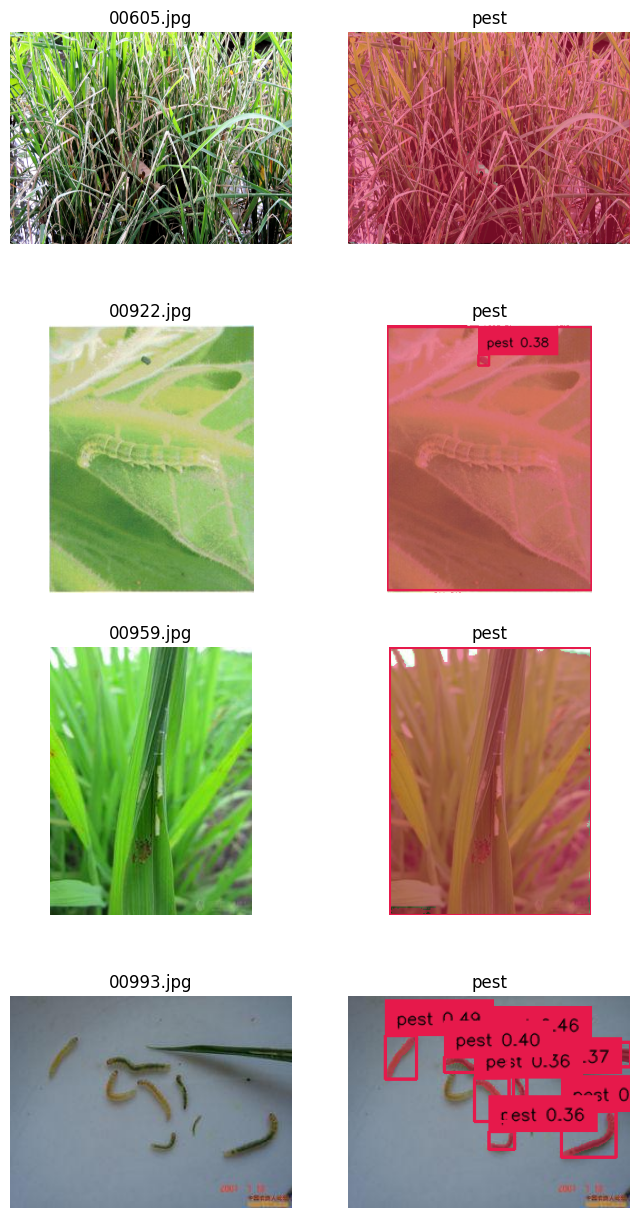

In [ ]:
from itertools import islice

plot_images = []
plot_titles = []

box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()

for image_name, detections in islice(filtered_annotations.items(), 4):  # showing first 4 samples
    image = all_images[image_name]
    plot_images.append(image)
    plot_titles.append(image_name)

    labels = [f"{CLASSES[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
    annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)
    plot_images.append(annotated_image)
    title = " ".join(set([CLASSES[class_id]for class_id in detections.class_id]))
    plot_titles.append(title)

# Adjust grid_size based on the number of images (8 in this case: 4 original + 4 annotated)
sv.plot_images_grid(
    images=plot_images,
    titles=plot_titles,
    grid_size=(4, 2),  # 4 rows, 2 columns
    size=(2 * 4, 4 * 4)  # Adjust the size accordingly
)


In [ ]:
PROJECT_NAME = "auto-generated-dataset-7"
PROJECT_DESCRIPTION = "auto-generated-dataset-7"

In [ ]:
import roboflow
from roboflow import Roboflow

roboflow.login()

workspace = Roboflow().workspace()
new_project = workspace.create_project(
    project_name=PROJECT_NAME,
    project_license="MIT",
    project_type="instance-segmentation",
    annotation=PROJECT_DESCRIPTION)

In [ ]:
# Iterate over splits (train, val, test)
splits = ['train', 'val', 'test']
for split in splits:
    split_dir = os.path.join('/kaggle/working/mask_rcnn_project', 'data',split)
    images_dir = os.path.join(split_dir, "images")
    annotations_dir = os.path.join(split_dir, "annotations")

    # Iterate over class-specific directories
    for class_id in os.listdir(images_dir):
        class_images_dir = os.path.join(images_dir, class_id)
        class_annotations_dir = os.path.join(annotations_dir, class_id)
        # Iterate over images in the class-specific directory
        image_paths = sv.list_files_with_extensions(
            directory=class_images_dir,
            extensions=IMAGES_EXTENSIONS
        )

        for image_path in tqdm(image_paths):
            image_name = image_path.name
            annotation_name = f"{image_path.stem}.xml"
            image_path = str(image_path)
            annotation_path = os.path.join(class_annotations_dir, annotation_name)
            if os.path.exists(annotation_path):
                new_project.upload(
                    image_path=image_path,
                    annotation_path=annotation_path,
                    split="train",
                    is_prediction=True,
                    overwrite=True,
                    tag_names=["auto-annotated-with-grounded-sam"],
                    batch_name="auto-annotated-with-grounded-sam"
                )

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [ ]:
import roboflow
from roboflow import Roboflow

# roboflow.login()

workspace = Roboflow().workspace()
new_project = workspace.create_project(
    project_name="instance-segmentation",
    project_license="MIT",
    project_type="instance-segmentation",
    annotation="coco-instance-segmentation")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# Iterate over splits (train, val, test)
splits = ['train', 'val', 'test']
for split in splits:
    split_dir = os.path.join('/kaggle/working/mask_rcnn_project', 'data',split)
    images_dir = os.path.join(split_dir, "images")
    annotations_dir = os.path.join(split_dir, "annotations")

    # Iterate over class-specific directories
    for class_id in os.listdir(images_dir):
        class_images_dir = os.path.join(images_dir, class_id)
        class_annotations_dir = os.path.join(annotations_dir, class_id)
        # Iterate over images in the class-specific directory
        image_paths = sv.list_files_with_extensions(
            directory=class_images_dir,
            extensions=IMAGES_EXTENSIONS
        )

        for image_path in tqdm(image_paths):
            image_name = image_path.name
            annotation_name = f"{image_path.stem}.xml"
            image_path = str(image_path)
            annotation_path = os.path.join(class_annotations_dir, annotation_name)
            if os.path.exists(annotation_path):
                new_project.upload(
                    image_path=image_path,
                    annotation_path=annotation_path,
                    split="train",
                    is_prediction=True,
                    overwrite=True,
                    tag_names=["auto-annotated-with-grounded-sam"],
                    batch_name="auto-annotated-with-grounded-sam"
                )

In [ ]:
!pip install -q 'git+https://github.com/facebookresearch/detectron2.git'

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 39.5 MB/s eta 0:00:0000:01


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.visualizer import Visualizer

In [ ]:
# Path setup
train_images_path = "/kaggle/working/mask_rcnn_project/data/train/images/"
train_annotations_path = "/kaggle/working/mask_rcnn_project/data/train/annotations/annotations.json"
train_images_path

'/kaggle/working/mask_rcnn_project/data/train/images/'

In [ ]:
# Path setup
val_images_path = "/kaggle/working/mask_rcnn_project/data/val/images"
val_annotations_path = "/kaggle/working/mask_rcnn_project/data/val/annotations/annotations.json"
val_images_path

'/kaggle/working/mask_rcnn_project/data/val/images'

In [ ]:
import json

# Load the train annotations
with open(train_annotations_path, "r") as f:
    train_data = json.load(f)

# Load the validation annotations
with open(val_annotations_path, "r") as f:
    val_data = json.load(f)

# Function to replace 'isCrowd' with 'iscrowd'
def replace_isCrowd_with_iscrowd(data):
    for annotation in data['annotations']:
        if 'isCrowd' in annotation:
            annotation['iscrowd'] = annotation.pop('isCrowd')
    return data

# Replace 'isCrowd' with 'iscrowd' in both datasets
train_data_updated = replace_isCrowd_with_iscrowd(train_data)
val_data_updated = replace_isCrowd_with_iscrowd(val_data)

# Save the updated annotations back to files
with open(train_annotations_path, "w") as f:
    json.dump(train_data_updated, f)

with open(val_annotations_path, "w") as f:
    json.dump(val_data_updated, f)

print("Replacement complete")

Replacement complete


In [ ]:
# Step 1: Register the dataset
if "train_dataset" not in DatasetCatalog.list():
    register_coco_instances("train_dataset", {}, train_annotations_path, train_images_path)
    print("Dataset 'train_dataset' is registered.")
else:
    print("Dataset 'train_dataset' is already registered.")

Dataset 'train_dataset' is registered.


In [ ]:
if "validate_dataset" not in DatasetCatalog.list():
    register_coco_instances("validate_dataset", {}, val_annotations_path, val_images_path)
    print("Dataset 'validate_dataset' is registered.")
else:
    print("Dataset 'validate_dataset' is already registered.")

Dataset 'validate_dataset' is registered.


In [ ]:
try:
    train_metadata = MetadataCatalog.get("train_dataset")
    train_dataset_dicts = DatasetCatalog.get("train_dataset")
    print("Metadata:", train_metadata)
except KeyError as e:
    print(f"Error: Dataset 'train_dataset' is not registered. Please check your registration code.")

[01/18 19:39:41 d2.data.datasets.coco]: Loaded 401 images in COCO format from /kaggle/working/mask_rcnn_project/data/train/annotations/annotations.json
Metadata: Metadata(name='train_dataset', json_file='/kaggle/working/mask_rcnn_project/data/train/annotations/annotations.json', image_root='/kaggle/working/mask_rcnn_project/data/train/images/', evaluator_type='coco', thing_classes=['pest'], thing_dataset_id_to_contiguous_id={1: 0})


In [ ]:
val_metadata = MetadataCatalog.get("validate_dataset")
val_dataset_dicts = DatasetCatalog.get("validate_dataset")
val_metadata

try:
    val_metadata = MetadataCatalog.get("validate_dataset")
    val_dataset_dicts = DatasetCatalog.get("validate_dataset")
    print("Metadata:", val_metadata)
except KeyError as e:
    print(f"Error: Dataset 'validate_dataset' is not registered. Please check your registration code.")

[01/18 19:40:32 d2.data.datasets.coco]: Loaded 33 images in COCO format from /kaggle/working/mask_rcnn_project/data/val/annotations/annotations.json
[01/18 19:40:32 d2.data.datasets.coco]: Loaded 33 images in COCO format from /kaggle/working/mask_rcnn_project/data/val/annotations/annotations.json
Metadata: Metadata(name='validate_dataset', json_file='/kaggle/working/mask_rcnn_project/data/val/annotations/annotations.json', image_root='/kaggle/working/mask_rcnn_project/data/val/images', evaluator_type='coco', thing_classes=['pest'], thing_dataset_id_to_contiguous_id={1: 0})


In [ ]:
# Step 3: Configure the model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))  # Mask R-CNN with ResNet-50
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Pretrained weights
cfg.DATASETS.TRAIN = ("train_dataset",)
cfg.DATASETS.TEST = ()  # No evaluation during training
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128

# Configuring hyperparameters for training
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Change this based on the number of classes in your dataset
cfg.SOLVER.BASE_LR = 0.00025  # Learning rate
cfg.SOLVER.MAX_ITER = 3000  # Number of iterations
cfg.SOLVER.IMS_PER_BATCH = 2


In [ ]:
# Output directory
cfg.OUTPUT_DIR = "/kaggle/working/detectron2_output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

In [ ]:
# Step 4: Train the model
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[01/18 19:45:46 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [ ]:
# Step 5: Save the trained model weights
trained_weights = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
print(f"Model saved at {trained_weights}")

Model saved at ./output/model_final.pth


In [ ]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor

# Load the configuration
cfg.MODEL.WEIGHTS = trained_weights  # Path to saved model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set a threshold for predictions
cfg.MODEL.ROI_HEADS.NUM_CLASSES =1

# Create a predictor
predictor = DefaultPredictor(cfg)


[01/18 20:09:26 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Create an evaluator for COCO format datasets
evaluator = COCOEvaluator("validate_dataset", cfg, False, output_dir="/kaggle/working/output/")

# Build a data loader for the test/validation dataset
val_loader = build_detection_test_loader(cfg, "validate_dataset")

# Run evaluation
results = inference_on_dataset(predictor.model, val_loader, evaluator)
print(results)


WARNING [01/18 20:09:34 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[01/18 20:09:34 d2.data.datasets.coco]: Loaded 33 images in COCO format from /kaggle/working/mask_rcnn_project/data/val/annotations/annotations.json
[01/18 20:09:34 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|    pest    | 50           |
|            |              |
[01/18 20:09:34 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[01/18 20:09:34 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[01/18 20:09:34 d2.data.common]: Serializing 33 elements to byte tensors and concatenating them all ...
[01/18 20:09:34 d2.data.common]: Serialized dataset takes 0.21 MiB
[01/18 20:0

TypeError: Argument 'bb' has incorrect type (expected numpy.ndarray, got list)

In [ ]:
from detectron2.config import get_cfg
from detectron2.model_zoo import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Pretrained weights
cfg.DATALOADER.NUM_WORKERS = 2

cfg.DATASETS.TRAIN = ("train_dataset",)
cfg.DATASETS.TEST = ()  # No evaluation during training
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.FPN.MULTILEVEL_ROIS = True  # Enabling multi-level features in FPN
# Configuring hyperparameters for training
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Change this based on the number of classes in your dataset
cfg.SOLVER.BASE_LR = 0.00025  # Learning rate
cfg.SOLVER.MAX_ITER = 300  # Number of iterations
cfg.SOLVER.IMS_PER_BATCH = 2
# Fine-tuning anchor box settings
cfg.MODEL.RPN.ANCHOR_SIZES = [[32, 64, 128, 256, 512]]  # Adjust anchor sizes
cfg.MODEL.RPN.ASPECT_RATIOS = [[0.5, 1.0, 2.0]]  # Modify aspect ratios

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[01/18 20:13:25 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Create an evaluator for COCO format datasets
evaluator = COCOEvaluator("validate_dataset", cfg, False, output_dir="/kaggle/working/output/")

# Build a data loader for the test/validation dataset
val_loader = build_detection_test_loader(cfg, "validate_dataset")

# Run evaluation
results = inference_on_dataset(predictor.model, val_loader, evaluator)
print(results)


WARNING [01/18 20:16:05 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[01/18 20:16:05 d2.data.datasets.coco]: Loaded 33 images in COCO format from /kaggle/working/mask_rcnn_project/data/val/annotations/annotations.json
[01/18 20:16:05 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[01/18 20:16:05 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[01/18 20:16:05 d2.data.common]: Serializing 33 elements to byte tensors and concatenating them all ...
[01/18 20:16:05 d2.data.common]: Serialized dataset takes 0.21 MiB
[01/18 20:16:05 d2.evaluation.evaluator]: Start inference on 33 batches
[01/18 20:16:06 d2.evaluation.evaluator]: Inference done 11/33. Dataloading: 0.0016 s/iter. Inference: 0.0949 s/iter. Eval: 0.0026 s/iter. To

TypeError: Argument 'bb' has incorrect type (expected numpy.ndarray, got list)

In [ ]:
from detectron2.utils.visualizer import Visualizer
from detectron2.structures import Boxes, Instances


image = cv2.imread("/kaggle/working/mask_rcnn_project/data/test/images/01255.jpg")
outputs = predictor(image)

# Apply NMS to predicted bounding boxes
instances = outputs["instances"].to("cpu")
boxes = instances.pred_boxes
scores = instances.scores
nms_threshold = 0.5  # IoU threshold for NMS
boxes

Boxes(tensor([[  0.0000,   9.7967, 225.7837, 454.9193],
        [ 58.7046,  37.1820, 329.9488, 465.3437],
        [145.0528, 124.6470, 349.4960, 455.7705],
        [ 33.4749, 205.7276, 249.0747, 467.0000]]))

In [ ]:
from detectron2.layers import nms

nms_threshold = 0.5  # IoU threshold for NMS

# Convert boxes and scores to tensors if not already
boxes_tensor = boxes.tensor  # Shape: [num_boxes, 4]
scores_tensor = scores  # Shape: [num_boxes]

# Apply NMS (NMS returns the indices of the kept boxes)
keep = nms(boxes_tensor, scores_tensor, nms_threshold)

# Filter the boxes using the indices returned by NMS
final_boxes = boxes_tensor[keep]

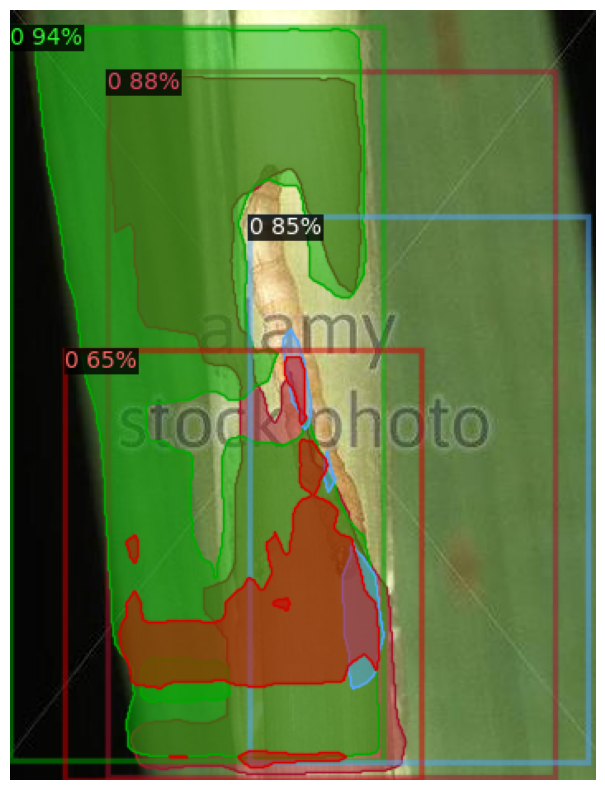

In [ ]:
# Visualize results after NMS using matplotlib
# Convert image to BGR (if using BGR images) for visualization with Detectron2's Visualizer
visualizer = Visualizer(image[:, :, ::-1], metadata=None)  # Convert from RGB to BGR
output = visualizer.draw_instance_predictions(instances[keep].to("cpu"))
output_image = output.get_image()

# Display the image with predictions in Google Colab
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.axis('off')
plt.show()